In [5]:
from cajal.nrn.cells import MRG
from simulators.python.problems.cajal_problems import generate_circular_arc
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

# Curve nerve
In Axonsim the curvature parameter is defined as a value between 0 (default) and 1 (90 degrees).
Here we make a similar behavior by first generating the coordinates (2D) and then applying them by traversing the nodes of the MRG model and changing its positions.


In [6]:
mrg = MRG()
num_nodes = len(mrg.node)
curved_positions = generate_circular_arc(radius=10000, num_nodes=num_nodes, total_angle=np.pi / 2)

for i, node in enumerate(mrg.node):
    h.pt3dclear(sec=node)
    x, y, z = curved_positions[i]
    h.pt3dadd(x, y, z, 1.0, sec=node)  # Add 3D po


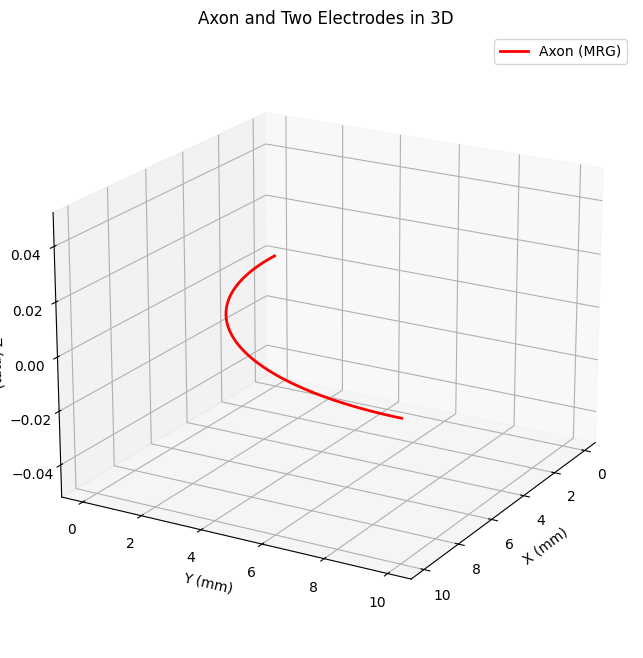

In [9]:
# Extract node positions
node_x = np.array([n.x3d(0) for n in mrg.node]) / 1000.0
node_y = np.array([n.y3d(0) for n in mrg.node]) / 1000.0
node_z = np.array([n.z3d(0) for n in mrg.node]) / 1000.0

# start_ele_x = pointsource_stim.x.value / 1000.0
# start_ele_y = pointsource_stim.y.value / 1000.0
# start_ele_z = pointsource_stim.z.value / 1000.0
#
# end_ele_x = pointsource_block.x.value / 1000.0
# end_ele_y = pointsource_block.y.value / 1000.0
# end_ele_z = pointsource_block.z.value / 1000.0

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the axon
ax.plot(node_x, node_y, node_z, color='red', label='Axon (MRG)', linewidth=2)

# # Plot electrodes
# ax.scatter(start_ele_x, start_ele_y, start_ele_z, color='green', s=80, marker='o', label='Stimulating Electrode')
# ax.scatter(end_ele_x, end_ele_y, end_ele_z, color='blue', s=80, marker='^', label='Blocking Electrode')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')
ax.view_init(elev=20, azim=30)

plt.title('Axon and Two Electrodes in 3D')
plt.legend()
plt.show()